<a href="https://colab.research.google.com/github/SaiVamsiPuttu/MLAlgorithmsFromScratch/blob/main/ML_Algorithms_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-End Machine Learning Project

In [29]:
import os
import tarfile
from six.moves import urllib
import numpy as np
import matplotlib.pyplot as plt



DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH  = os.path.join("/content/drive/MyDrive/MLAlgorithmsFromScratch/DataSets/", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(hosuing_url = HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)

  tgz_path = os.path.join(housing_path,"housing.tgz")
  urllib.request.urlretrieve(hosuing_url,tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()


fetch_housing_data(HOUSING_URL, HOUSING_PATH)

In [3]:
import pandas as pd

def load_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
  csvPath = os.path.join(housing_path,"housing.csv")
  if not os.path.isfile(csvPath):
    fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH)
  return pd.read_csv(csvPath)

## The info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values

In [4]:
data = load_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## The describe() method shows a summary of the numerical attributes
### The std row shows the standard deviation, which measures how dispersed the values are
### The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls.
### Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). You can either plot this one attribute at a time, or you can call the hist() method on the whole dataset, and it will plot a histogram for each numerical attribute

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### The hist() method relies on Matplotlib, which in turn relies on a user-specified graphical backend to draw on your screen. So before you can plot anything, you need to specify which backend Matplotlib should use. The simplest option is to use Jupyter’s magic command %matplotlib inline. This tells Jupyter to set up Matplotlib so it uses Jupyter’s own backend. Plots are then rendered within the notebook itself. Note that calling show() is optional in a Jupyter notebook, as Jupyter will automatically display plots when a cell is executed.

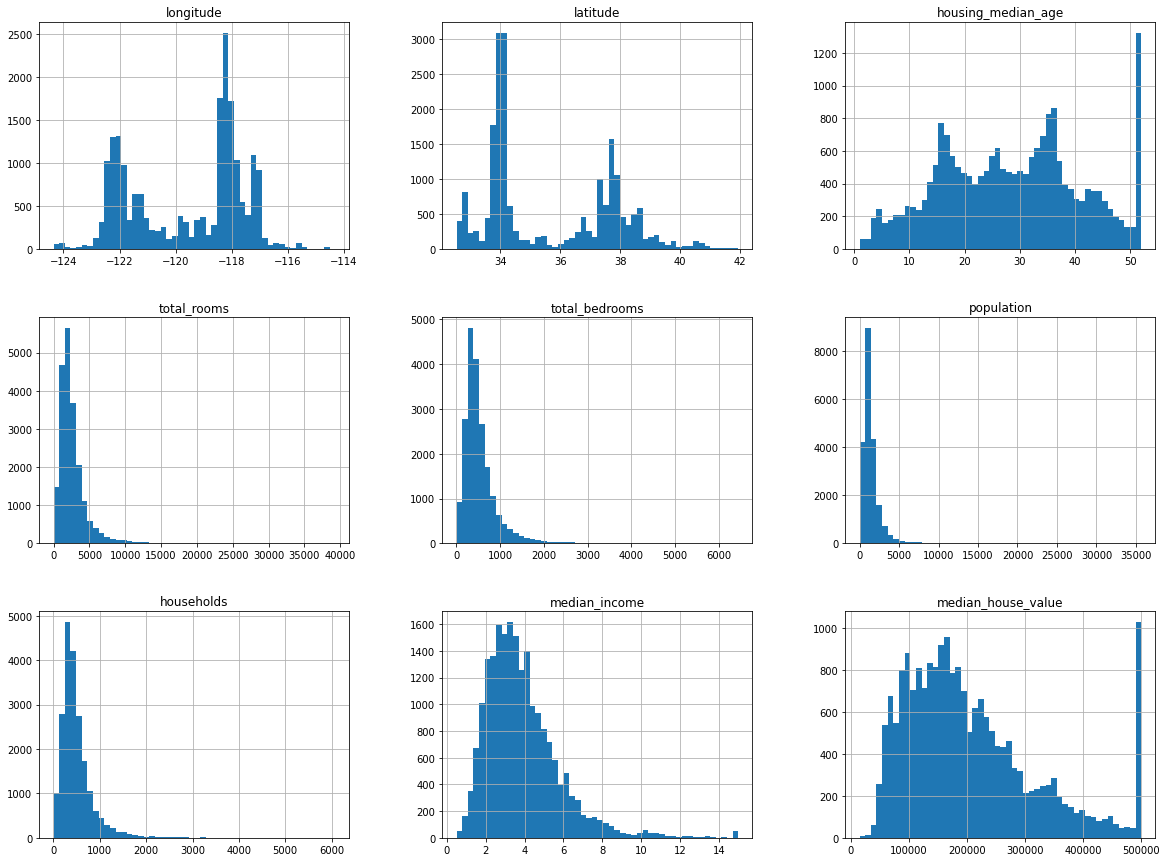

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

data.hist(bins=50,figsize=(20,15))
plt.show()

### Code to split train,test set without using library function
#### The permutation() method returns a re-arranged array (and leaves the original array un-changed),this method will keep the original array intact and will return a shuffled array, for example x = [1,4,2,8] is the original array and the permutation method will return the rearranged array (lets say [8,4,1,2]).Now,you have two arrays, original array and the rearranged array.

#### In the other hand,

#### The shuffle() method makes changes to the original array,for example x = [1,4,2,8] is the original array and the shuffle method will return the shuffled array(lets say shuffled array is [8,4,1,2]). Now , the original array itself got changed to the Shuffled array, and you are only left with the shuffled array.

In [ ]:
import numpy as np

def split_train_test(data,test_ratio):

  shuffled_indices = np.random.permutation(len(data))
  test_size = int((len(data)) * test_ratio)
  test_shuff_indices = shuffled_indices[:test_size]
  train_shuff_indices = shuffled_indices[test_size:]

  return data.iloc[train_shuff_indices], data.iloc[test_shuff_indices]

data_train,data_test = split_train_test(data,0.2)

if you run the program again, it will generate a different test set! Over time, you (or your Machine Learning algorithms) will get to see the whole dataset, which is what you want to avoid.

One solution is to save the test set on the first run and then load it in subsequent runs. Another option is to set the random number generator’s seed (e.g., np.random.seed(42))13 before calling np.random.permutation(), so that it always generates the same shuffled indices.

But both these solutions will break next time you fetch an updated dataset. A common solution is to use each instance’s identifier to decide whether or not it should go in the test set (assuming instances have a unique and immutable identifier). For example, you could compute a hash of each instance’s identifier and put that instance in the test set if the hash is lower or equal to 20% of the maximum hash value. This ensures that the test set will remain consistent across multiple runs, even if you refresh the dataset. The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set. Here is a possible implementation:

In [11]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

The crc32 function outputs an unsigned 32-bit number, and the code tests if the CRC value is lower than the test_ratio times the maximum 32-bit number.

The & 0xffffffff mask is there only to ensure compatibility with Python 2 and 3. In Python 2 the same function could return a signed integer, in a range from -(2^31) to (2^31) - 1, masking this with the 0xffffffff mask normalises the value to a signed.

If we use the row index as a unique identifier, we need to make sure that new data gets appended to the end of the dataset, and no row ever gets deleted. If this is not possible, then we can try to use the most stable features to build a unique identifier. For example, a district’s latitude and longitude are guaranteed to be stable for a few million years, so we could combine them into an ID like so

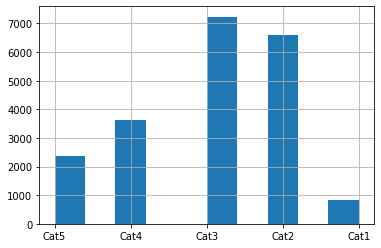

In [20]:
data["income_cat"] = pd.cut(data["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=['Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5'])
data['income_cat'].hist()

In [14]:
ids = df_with_id['index']
in_test_set = ids.apply(lambda id_: test_set_check(id_, 0.2))
print(in_test_set)

0        False
1        False
2         True
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: index, Length: 20640, dtype: bool


In [6]:
df_with_id = data.reset_index()
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index")

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### stratified sampling

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [23]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

Cat3    0.350533
Cat2    0.318798
Cat4    0.176357
Cat5    0.114583
Cat1    0.039729
Name: income_cat, dtype: float64

If the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast.

### Discovery and Data Visualization of California Housing data

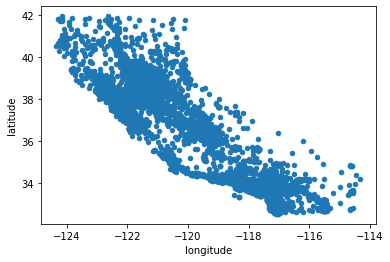

In [24]:
data.plot(kind='scatter',x='longitude',y='latitude')

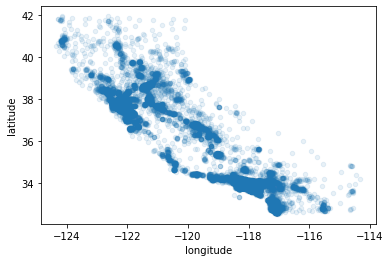

In [26]:
data.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

### he radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices):

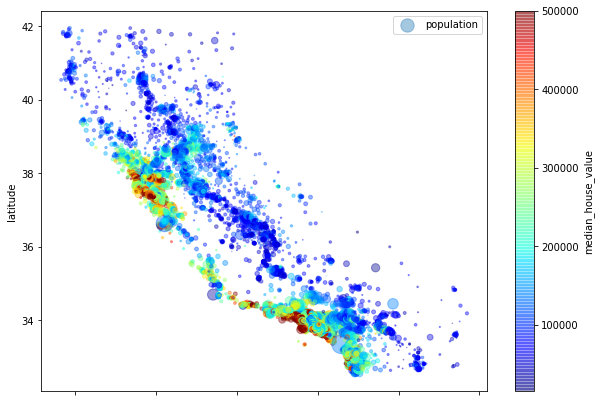

In [31]:
data.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=data['population']/100,label='population',figsize=(10,7),
          c='median_house_value',cmap=plt.get_cmap("jet"),colorbar="true",)
plt.legend()

## Prepare the Data for Machine Learning Algorithms